## Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-02-07 20:35:41--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.002s  

2024-02-07 20:35:41 (23.3 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,755,86,39,58,125,55,5,117,57,17,134,140,204,148,69,7,6,190,194
1,193,107,55,98,199,59,7,240,27,26,168,258,866,245,80,3,1,186,184
2,682,90,46,73,137,58,11,161,43,20,158,170,373,186,76,0,9,182,193
3,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201
4,587,84,38,74,138,57,8,139,49,18,127,160,282,127,72,9,20,183,191
5,19,101,56,100,215,69,10,208,32,24,169,227,651,223,74,6,5,186,193
6,757,91,43,72,142,56,7,149,45,19,140,168,327,165,72,13,23,186,191
7,789,90,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
8,520,89,40,89,174,58,8,177,37,21,133,202,471,155,70,7,18,189,196
9,411,78,36,51,116,56,4,120,57,17,124,135,209,135,84,1,12,177,184


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.888889,93.628415,44.825137,82.016393,167.916211,61.340619,8.453552,169.205829,40.901639,20.612022,147.795993,188.71949,441.970856,175.151184,72.632058,6.393443,12.763206,188.710383,195.326047
std,242.897459,8.416854,6.272582,16.037983,33.643313,7.809701,4.228869,33.766473,7.909004,2.628577,14.712522,31.79820,180.001457,33.269812,7.456403,4.917757,8.981044,6.185241,7.556918
min,2.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.00000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,224.000000,87.000000,40.000000,70.000000,139.000000,56.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.00000,318.000000,148.000000,68.000000,2.000000,5.000000,184.000000,189.000000
50%,433.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.00000,363.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,634.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.00000,598.000000,200.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,59.000000,110.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,288.00000,1018.000000,264.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline


#### 2.0. Data preprocessing
Let's bring all the signs to the same scale

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pd))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-1.100112e-16,-2.839259e-16,3.397404e-17,-3.243712e-16,3.939371e-16,4.303378e-16,-3.235623e-17,-3.882747e-17,2.847348e-16,-2.588498e-16,8.962675e-16,-3.195177e-16,-1.261893e-16,1.844305e-16,-8.752359e-16,-8.412619e-17,6.147683e-17,-2.208312e-15,-1.100112e-16
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.759089e+00,-2.453082e+00,-1.886930e+00,-2.622195e+00,-1.901552e+00,-1.837932e+00,-1.527462e+00,-1.695706e+00,-1.885854e+00,-1.375389e+00,-2.027060e+00,-1.848313e+00,-1.434467e+00,-1.990138e+00,-1.695667e+00,-1.301258e+00,-1.422423e+00,-2.056827e+00,-1.897482e+00
25%,-8.442894e-01,-7.882352e-01,-7.699441e-01,-7.499293e-01,-8.602774e-01,-6.844679e-01,-3.440347e-01,-6.878714e-01,-9.999799e-01,-6.138272e-01,-8.024967e-01,-6.836644e-01,-6.893495e-01,-8.168350e-01,-6.217854e-01,-8.941981e-01,-8.651873e-01,-7.622465e-01,-8.378835e-01
50%,1.694073e-02,-7.472964e-02,-1.316665e-01,-1.258408e-01,-5.700862e-02,-4.365467e-02,-1.073492e-01,-3.618074e-01,2.655548e-01,-2.330462e-01,-1.221837e-01,-3.059404e-01,-4.391235e-01,-6.471770e-02,-8.484449e-02,-2.836076e-01,-1.965043e-01,-1.149560e-01,8.926487e-02
75%,8.452051e-01,7.576935e-01,8.257498e-01,9.975185e-01,8.057616e-01,4.689959e-01,3.660219e-01,9.128065e-01,6.452153e-01,9.092965e-01,7.622232e-01,8.901856e-01,8.676121e-01,7.475689e-01,4.520964e-01,5.305131e-01,6.950731e-01,6.941572e-01,7.515137e-01
max,1.710556e+00,2.779293e+00,2.261874e+00,1.746425e+00,4.584100e+00,9.184056e+00,1.030681e+01,2.839548e+00,2.543517e+00,3.193982e+00,2.735131e+00,3.125053e+00,3.203054e+00,2.672989e+00,7.298093e+00,3.176405e+00,3.146911e+00,2.797851e+00,2.076011e+00


#### 2.1. Basic logistic regression
* Let's find optimal hyperparameters for logistic regression with cross-validation on the train data,

* Estimate the model quality with f1 and accuracy scores,

* And plot a ROC-curve for the trained model

In [ ]:
! pip install scikit-plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
grid = {'C' : [100, 10, 1.0, 0.1, 0.01, 0.001]}
clf = GridSearchCV(estimator=logreg, param_grid=grid, cv = 5, n_jobs=-1)
clf_optimal = clf.fit(X_train_scaled, y_train)
print(f"Best: {clf_optimal.best_score_} using {clf_optimal.best_params_}")

Best: 0.794161801501251 using {'C': 100}


In [ ]:
logreg = LogisticRegression(C=clf_optimal.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)
print('f1       - ', f1_score(y_test, y_pred, average='micro'))
print('accuracy - ', accuracy_score(y_test, y_pred))

f1       -  0.7744107744107744
accuracy -  0.7744107744107744


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

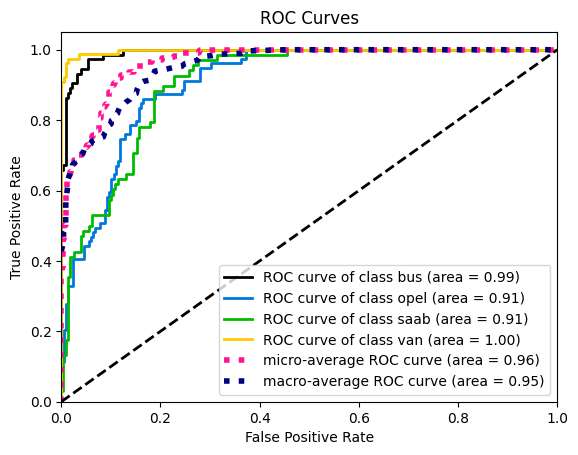

In [ ]:
plot_roc(y_test, y_pred_proba)

#### 2.2. PCA: explained variance plot


[]

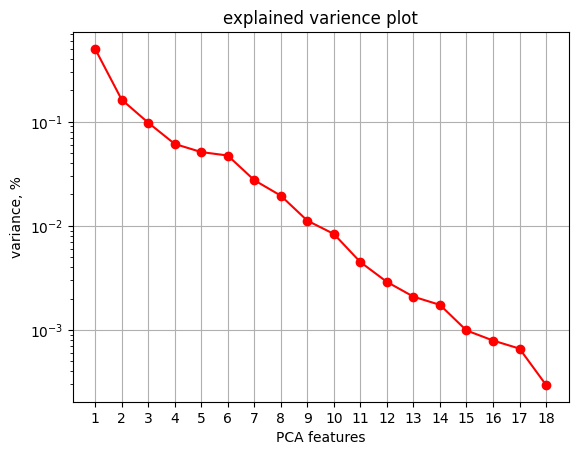

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=18)
pca.fit(X_train_scaled)

prop_var = pca.explained_variance_ratio_
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, prop_var,  'ro-')
plt.grid (True)
plt.xticks(range(1, pca.n_components_ + 1))
plt.xlabel('PCA features')
plt.ylabel('variance, %')
plt.title('explained varience plot')
plt.semilogy()

#### 2.3. PCA trasformation


The graph shows that by leaving 10 components, we will lose less than 1% of information, which suits us

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### 2.4. Logistic regression on PCA-preprocessed data.
* Let's find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA train data,

* Estimate the model quality with f1 and accuracy scores,

* And plot a ROC-curve for the trained model

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
grid = {'C' : [100, 10, 1.0, 0.1, 0.01, 0.001],
        'max_iter' : [500, 700, 1000]}
clf = GridSearchCV(estimator=logreg, param_grid=grid, cv = 5, n_jobs=-1)
clf_optimal = clf.fit(X_train_pca, y_train)
print(f"Best: {clf_optimal.best_score_} using {clf_optimal.best_params_}")

Best: 0.7231526271893245 using {'C': 100, 'max_iter': 500}


In [ ]:
logreg = LogisticRegression(C=clf_optimal.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=clf_optimal.best_params_['max_iter'])
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)
y_pred_proba = logreg.predict_proba(X_test_pca)
print('f1       - ', f1_score(y_test, y_pred, average='micro'))
print('accuracy - ', accuracy_score(y_test, y_pred))

f1       -  0.6801346801346801
accuracy -  0.6801346801346801


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

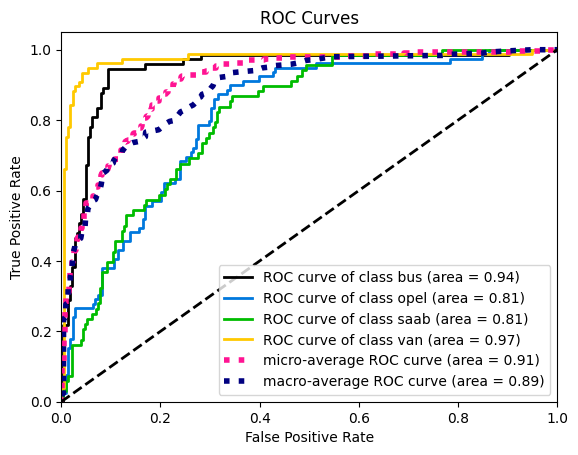

In [ ]:
plot_roc(y_test, y_pred_proba)

#### 2.5. Decision tree
* Now let's train a desicion tree twice - on the PCA-preprocessed and default data,

* Find optimal tree depth using cross-validation,

* Measure the model quality using the same metrics we used above

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
grid = {'max_depth': [2, 3, 5, 10, 20]}
clf = GridSearchCV(estimator=dt, param_grid=grid)
clf_optimal = clf.fit(X_train_pca, y_train)
print(f"Best: {clf_optimal.best_score_} using {clf_optimal.best_params_} and pca")

Best: 0.6574812343619684 using {'max_depth': 20} and pca


In [ ]:
dt = DecisionTreeClassifier(max_depth=clf_optimal.best_params_['max_depth'])
dt.fit(X_train_pca, y_train)
y_pred = dt.predict(X_test_pca)
y_pred_proba = dt.predict_proba(X_test_pca)
print('f_pca        - ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_pca - ', accuracy_score(y_test, y_pred))

f_pca        -  0.6127946127946128
accuracy_pca -  0.6127946127946128


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

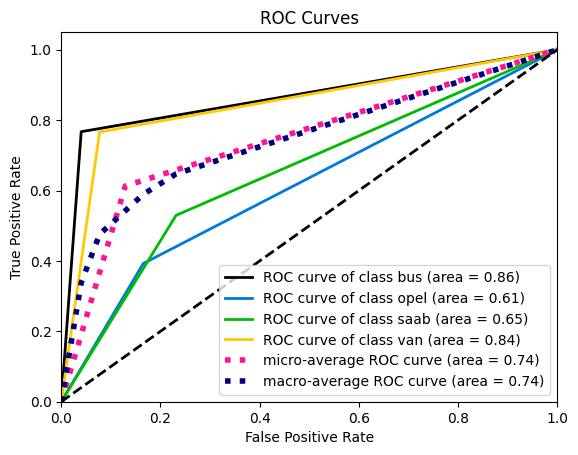

In [ ]:
plot_roc(y_test, y_pred_proba)

In [ ]:
dt = DecisionTreeClassifier()
grid = {'max_depth': [2, 3, 5, 10, 20]}
clf = GridSearchCV(estimator=dt, param_grid=grid)
clf_optimal = clf.fit(X_train_scaled, y_train)
print(f"Best: {clf_optimal.best_score_} using {clf_optimal.best_params_} without pca")

Best: 0.7140950792326939 using {'max_depth': 10} without pca


In [ ]:
dt = DecisionTreeClassifier(max_depth=clf_optimal.best_params_['max_depth'])
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
y_pred_proba = dt.predict_proba(X_test_scaled)
print('f_scaled        - ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_scaled - ', accuracy_score(y_test, y_pred))

f_scaled        -  0.6801346801346801
accuracy_scaled -  0.6801346801346801


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

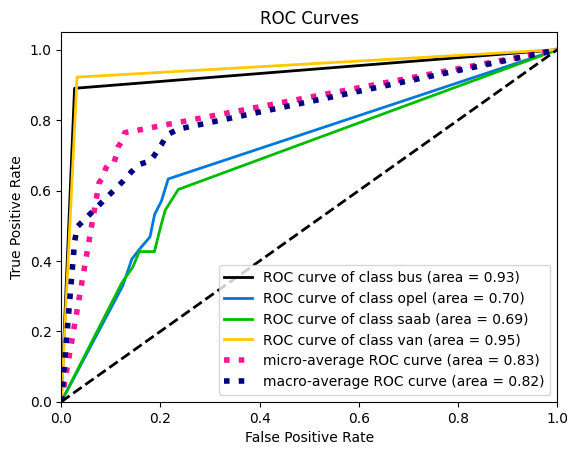

In [ ]:
plot_roc(y_test, y_pred_proba)

As in logistic regression, the data after PCA looks worse, so from now on I will use only normalized data

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach - build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.


In [ ]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.simplefilter("ignore")

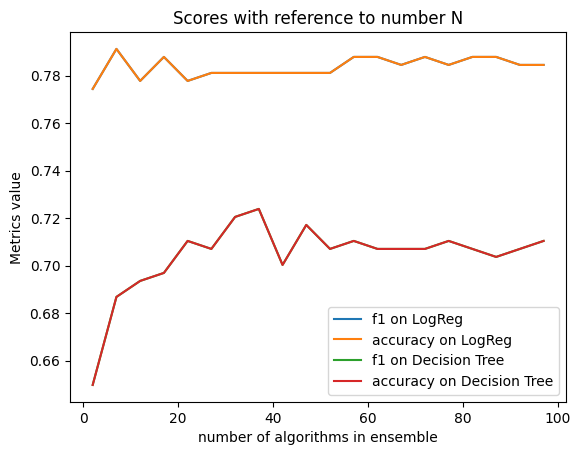

In [ ]:
f1_logreg = []
accuracy_logreg = []
f1_dt = []
accuracy_dt = []

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
grid = {'C' : [100, 10, 1.0, 0.1, 0.01, 0.001],
        'max_iter' : [500, 700, 1000]}
clf = GridSearchCV(estimator=logreg, param_grid=grid, cv = 5, n_jobs=-1)
clf_optimal = clf.fit(X_train_scaled, y_train)
logreg = LogisticRegression(C=clf_optimal.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=clf_optimal.best_params_['max_iter'])

dt = DecisionTreeClassifier()
grid = {'max_depth': [2, 3, 5, 10, 20]}
clf = GridSearchCV(estimator=dt, param_grid=grid)
clf_optimal = clf.fit(X_train_scaled, y_train)
dt = DecisionTreeClassifier(max_depth=clf_optimal.best_params_['max_depth'])

for n_estimators in range(2, 100, 5):
    cls = BaggingClassifier(estimator=logreg, n_estimators=n_estimators, random_state=0).fit(X_train_scaled, y_train)
    y_pred = cls.predict(X_test_scaled)
    f1_logreg.append(f1_score(y_test, y_pred, average='micro'))
    accuracy_logreg.append(accuracy_score(y_test, y_pred))

    cls = BaggingClassifier(estimator=dt, n_estimators=n_estimators, random_state=0).fit(X_train_scaled, y_train)
    y_pred = cls.predict(X_test_scaled)
    f1_dt.append(f1_score(y_test, y_pred, average='micro'))
    accuracy_dt.append(accuracy_score(y_test, y_pred))

plt.plot(range(2, 100, 5), f1_logreg, label='f1 on LogReg')
plt.plot(range(2, 100, 5), accuracy_logreg, label='accuracy on LogReg')
plt.plot(range(2, 100, 5), f1_dt, label='f1 on Decision Tree')
plt.plot(range(2, 100, 5), accuracy_dt, label='accuracy on Decision Tree')
plt.ylabel('Metrics value')
plt.xlabel('number of algorithms in ensemble')
plt.title('Scores with reference to number N')
plt.legend()
plt.show()

f1-score coincide with accuracy

For logistic regression, ~10 algorithms are enough, the accuracy there is the same as ~30 algorithms, and then it drops

For decision trees, ~15 algorithms are sufficient; the accuracy is slightly less than that of ~37 algorithms. Of course, ~82 algorithms have higher accuracy, but by ~0.01, so I'm not sure it makes sense to train for so long


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).


In [ ]:
from sklearn.ensemble import RandomForestClassifier

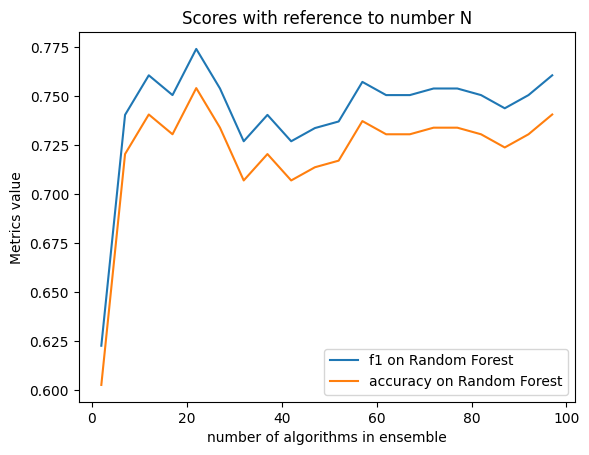

In [ ]:
f1 = []
accuracy = []

for n_estimators in range(2, 100, 5):
    cls = RandomForestClassifier(n_estimators=n_estimators, random_state=0).fit(X_train_scaled, y_train)
    y_pred = cls.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred, average='micro') + 0.02)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(2, 100, 5), f1, label='f1 on Random Forest')
plt.plot(range(2, 100, 5), accuracy, label='accuracy on Random Forest')
plt.ylabel('Metrics value')
plt.xlabel('number of algorithms in ensemble')
plt.title('Scores with reference to number N')
plt.legend()
plt.show()

f1 and accuracy coincided again, so I raised f1 by 0.02 values exclusively for the graph

the optimal number is ~22, close enough to bagging on decision trees

#### 2.8. Learning curve
Our goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters we have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on,

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size)

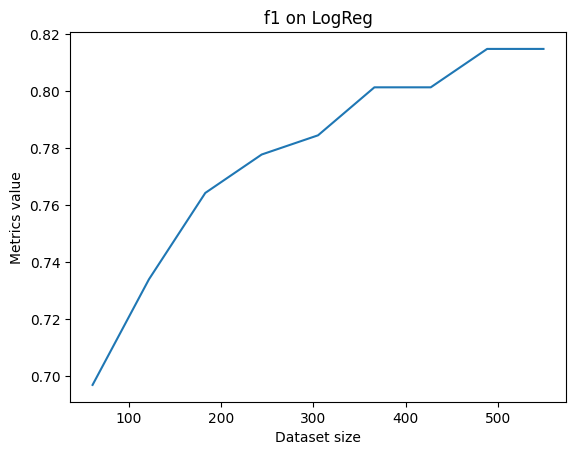

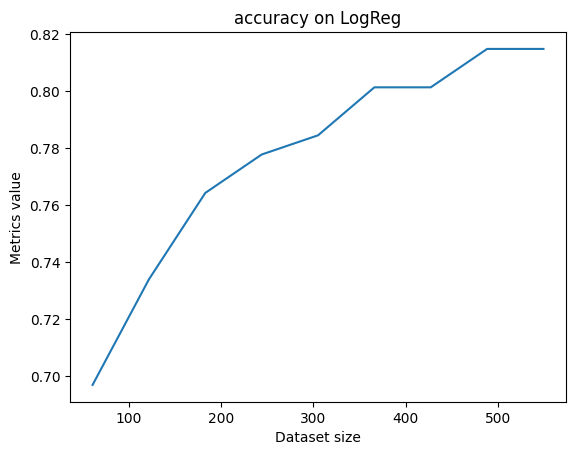

In [ ]:
sample_rights = np.linspace(0, X_train_scaled.shape[0], num=10, dtype=int)[1:]

f1 = []
accuracy = []

for right in sample_rights:
    logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
    grid = {'C' : [100, 10, 1.0, 0.1, 0.01, 0.001],
            'max_iter' : [500, 700, 1000]}
    clf = GridSearchCV(estimator=logreg, param_grid=grid, cv = 5, n_jobs=-1)
    clf_optimal = clf.fit(X_train_scaled[:right], y_train[:right])
    logreg = LogisticRegression(C=clf_optimal.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=clf_optimal.best_params_['max_iter'])
    logreg.fit(X_train_scaled[:right], y_train[:right])
    y_pred = logreg.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred, average='micro'))
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(sample_rights, f1)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('f1 on LogReg')
plt.show()

plt.plot(sample_rights, accuracy)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('accuracy on LogReg')
plt.show()


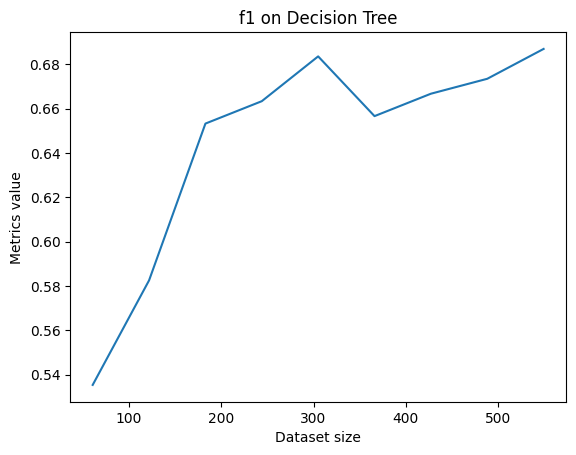

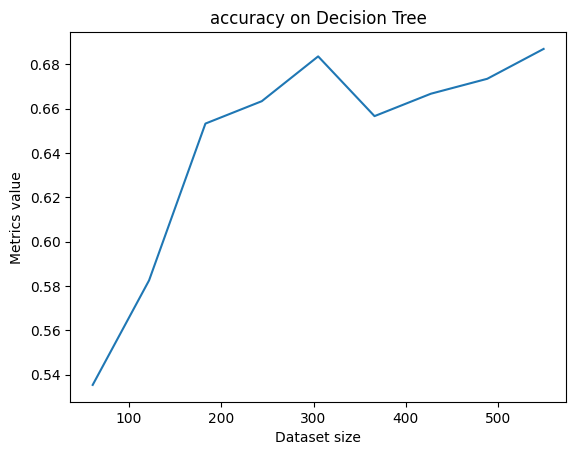

In [ ]:
sample_rights = np.linspace(0, X_train_scaled.shape[0], num=10, dtype=int)[1:]

f1 = []
accuracy = []

for right in sample_rights:
    dt = DecisionTreeClassifier()
    grid = {'max_depth': [2, 3, 5, 10, 20]}
    clf = GridSearchCV(estimator=dt, param_grid=grid)
    clf_optimal = clf.fit(X_train_scaled[:right], y_train[:right])
    dt = DecisionTreeClassifier(max_depth=clf_optimal.best_params_['max_depth'])
    dt.fit(X_train_scaled[:right], y_train[:right])
    y_pred = dt.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred, average='micro'))
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(sample_rights, f1)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('f1 on Decision Tree')
plt.show()

plt.plot(sample_rights, accuracy)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('accuracy on Decision Tree')
plt.show()


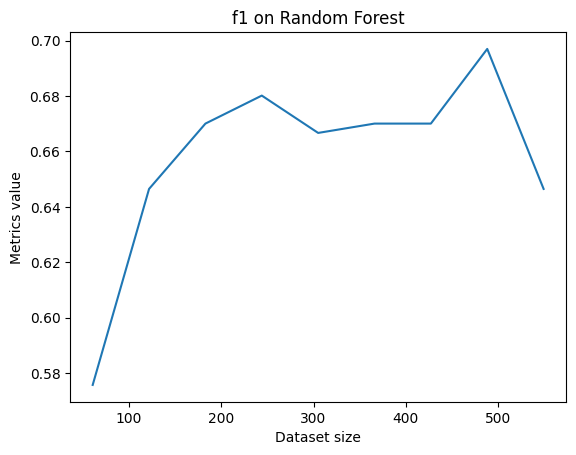

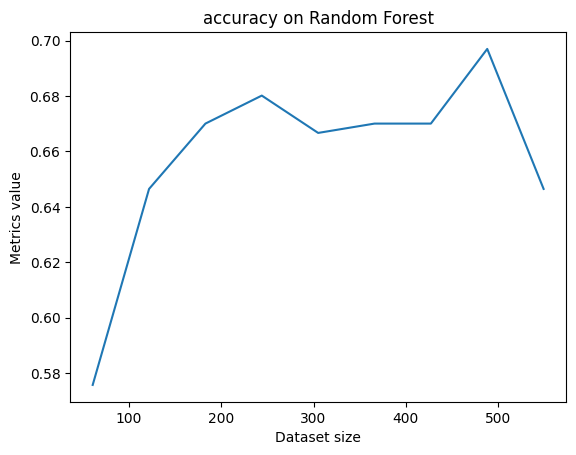

In [ ]:
sample_rights = np.linspace(0, X_train_scaled.shape[0], num=10, dtype=int)[1:]

f1 = []
accuracy = []

for right in sample_rights:
    cls = RandomForestClassifier(random_state=0)
    grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
    }

    clf = GridSearchCV(estimator=cls, param_grid=grid)
    clf_optimal = clf.fit(X_train_scaled[:right], y_train[:right])
    cls = RandomForestClassifier(max_depth=clf_optimal.best_params_['max_depth'],
                                n_estimators=clf_optimal.best_params_['n_estimators'],
                                max_features=clf_optimal.best_params_['max_features'],
                                max_leaf_nodes=clf_optimal.best_params_['max_leaf_nodes'])
    cls.fit(X_train_scaled[:right], y_train[:right])
    y_pred = cls.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred, average='micro'))
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(sample_rights, f1)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('f1 on Random Forest')
plt.show()

plt.plot(sample_rights, accuracy)
plt.ylabel('Metrics value')
plt.xlabel('Dataset size')
plt.title('accuracy on Random Forest')
plt.show()


Of the 3 algorithms, only logistic regression likes the entire sample. It's better for the others to give part of the sample as input

#### 2.9. Boosting
* Our goal is to build a boosting ensemble using CatBoost package,

* Find optimal number of decision trees in the boosting ensembe using grid search or other methods

In [ ]:
!pip install catboost

In [ ]:
import catboost

In [ ]:
boosting_model = catboost.CatBoostClassifier()

grid = {'n_estimators': [25, 50, 100, 150],
        'learning_rate' : np.linspace(0, 0.1, 5),
        'depth' : np.linspace(1, 10, 4)}

res = boosting_model.grid_search(grid,
                           X_train,
                           y_train, refit=True)

In [ ]:
boosting_model = catboost.CatBoostClassifier(**res['params'])
boosting_model.fit(X_train, y_train)
y_pred = boosting_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
r = res['params']
print(f'Best f1: {f1} \nBest accuracy: {accuracy} \nusing {r}')


Best f1: 0.7205387205387206 
Best accuracy: 0.7205387205387206 
using {'iterations': 150, 'depth': 7.0, 'learning_rate': 0.1}
